Dans ce fichier, je reconstruit un modèle comme dans le fichier satellite.ipynb mais avec un dataset plus grand.
Ce code utilise le dataset complet avec 10 classes et un total de 27 000 images.

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chemin vers votre dossier de données
dataset_path = r'/Users/alexd/Documents/etudes/M2/analyseImage/CMI/model/EuroSat_10Classes'

# Paramètres
batch_size = 32
img_height = 64
img_width = 64
validation_split = 0.2

# Création d'un ImageDataGenerator pour prétraiter les images
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split
)

# Générateur pour les données d'entraînement
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Générateur pour les données de validation
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


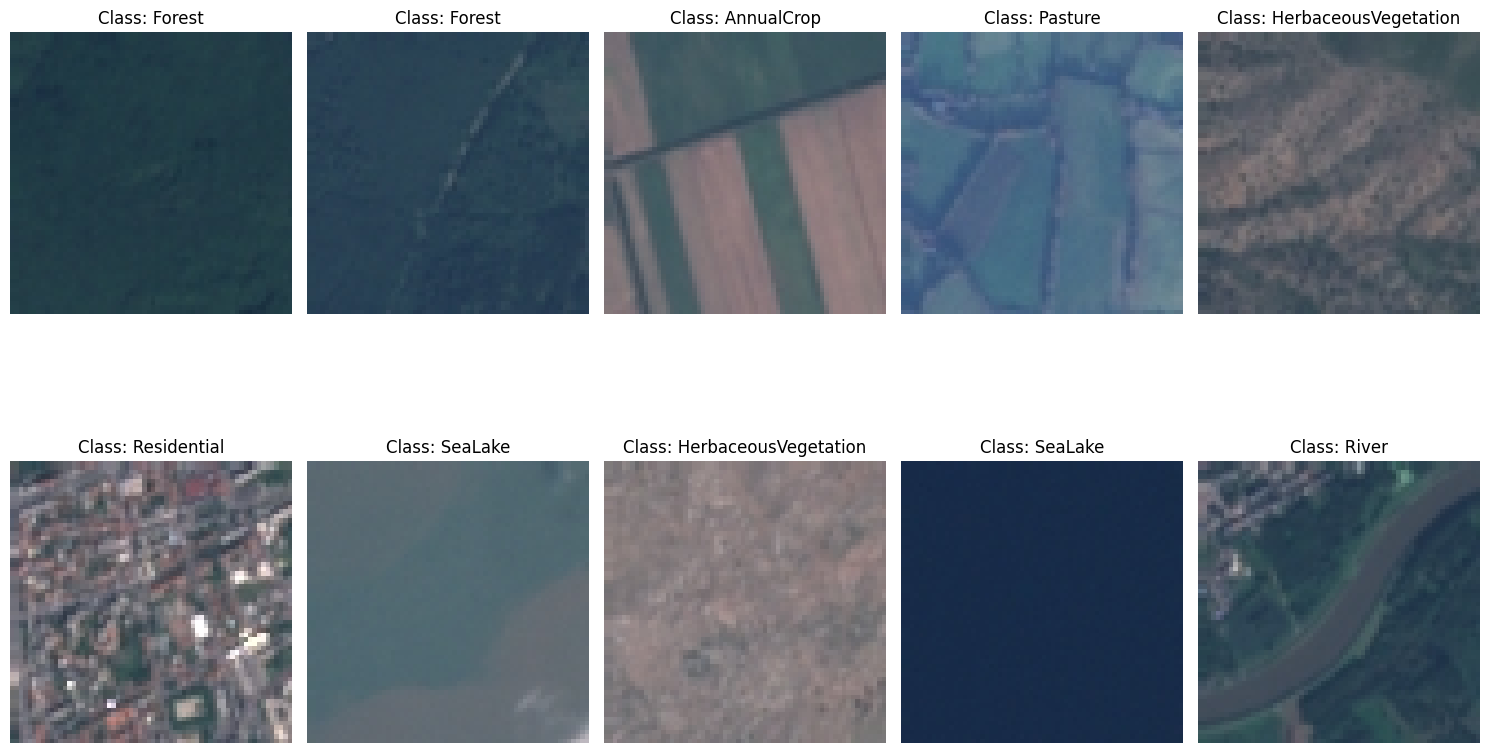

In [26]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)

num_images = 10

# Création d'une figure pour afficher les images
plt.figure(figsize=(15, 10))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title('Class: ' + list(train_generator.class_indices.keys())[labels[i].argmax()])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Première couche convolutive
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    # Deuxième couche convolutive
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Troisième couche convolutive
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Flatten
    Flatten(),
    # Couches denses
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.summary()

/Users/alexd/Documents/etudes/M2/analyseImage/CMI/model/VirtualEnv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,458,186 (9.38 MB)

 Trainable params: 2,458,186 (9.38 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=8
)

Epoch 1/8


/Users/alexd/Documents/etudes/M2/analyseImage/CMI/model/VirtualEnv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


675/675 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.3898 - loss: 1.5471 - val_accuracy: 0.7174 - val_loss: 0.7932
Epoch 2/8
675/675 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.6859 - loss: 0.8803 - val_accuracy: 0.7880 - val_loss: 0.6006
Epoch 3/8
675/675 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.7574 - loss: 0.6887 - val_accuracy: 0.7917 - val_loss: 0.5716
Epoch 4/8
675/675 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.7864 - loss: 0.5959 - val_accuracy: 0.8063 - val_loss: 0.5416
Epoch 5/8
675/675 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.8158 - loss: 0.5282 - val_accuracy: 0.8298 - val_loss: 0.4779
Epoch 6/8
675/675 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.8349 - loss: 0.4671 - val_accuracy: 0.8339 - val_loss: 0.4630
Epoch 7/8
675/675 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.8538 - loss: 0.4131 - val_accuracy: 0.8370 - val_loss: 0.4673
Epoch 8/8
675/675 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.8739 - loss: 0.3623 - val_accuracy: 0.86

In [30]:
model.save('modele10Classes.h5')

169/169 - 2s - 11ms/step - accuracy: 0.8631 - loss: 0.3914

Test accuracy: 0.8631481528282166


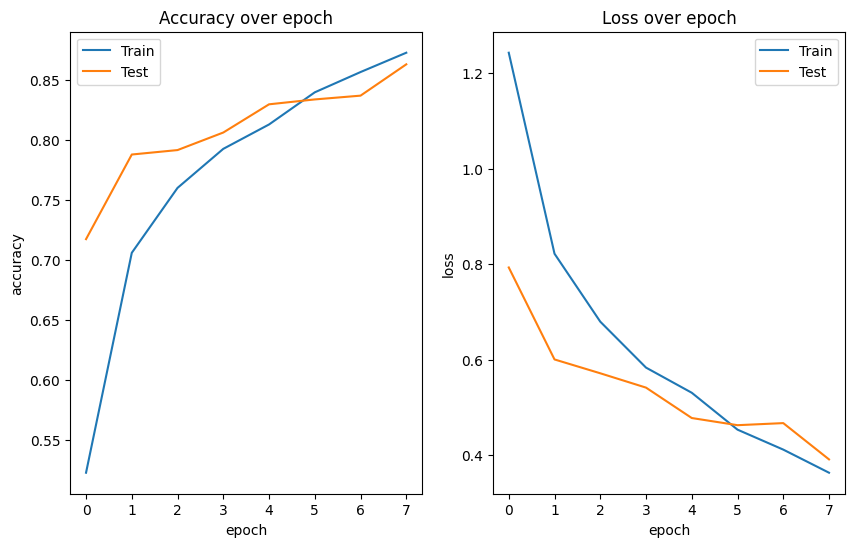

In [31]:
## visualisation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.set_title('Accuracy over epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])

ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.set_title('Loss over epoch')
ax2.legend(['Train', 'Test'], loc="upper right")

#Affiche les performances du modèle

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc)



In [32]:
from tensorflow.keras.models import load_model

# Charger le modèle
model = load_model('modele10Classes.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


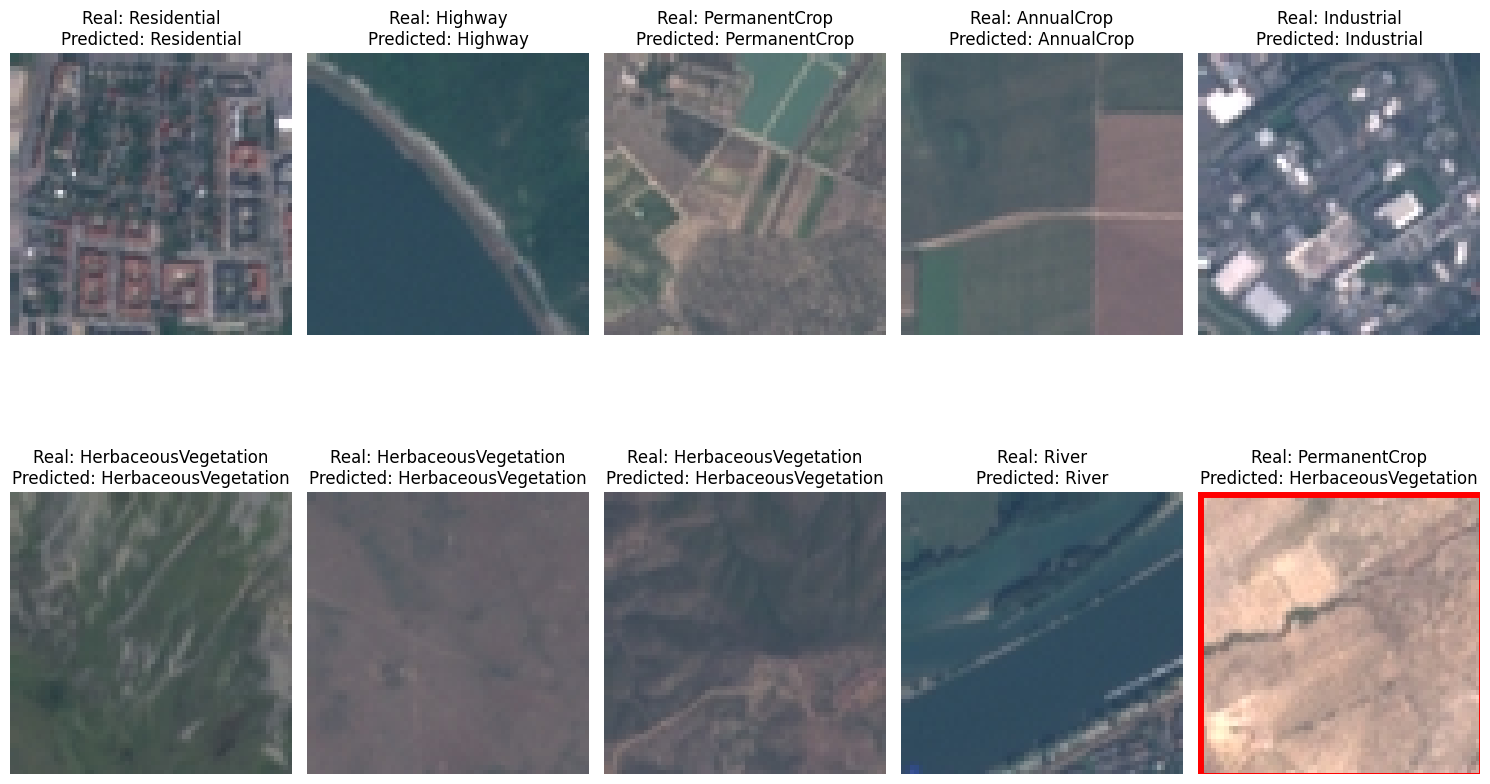

In [33]:
# Affichage d'images aléatoires avec leurs prédictions

import random
import numpy as np
from tensorflow.keras.preprocessing import image

def load_and_prepare_image(file_path):
    img = image.load_img(file_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

image_paths = validation_generator.filepaths
real_classes = validation_generator.classes

# 10 images aléatoire
random_indices = random.sample(range(len(image_paths)), 10)
random_image_paths = [image_paths[i] for i in random_indices]
random_real_classes = [real_classes[i] for i in random_indices]


plt.figure(figsize=(15, 10))
for i, (image_path, real_class) in enumerate(zip(random_image_paths, random_real_classes)):
    new_image = load_and_prepare_image(image_path)
    
    # Prediction
    prediction = model.predict(new_image)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_class_name = list(train_generator.class_indices.keys())[predicted_class[0]]
    real_class_name = list(train_generator.class_indices.keys())[real_class]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.load_img(image_path))
    plt.title(f'Real: {real_class_name}\nPredicted: {predicted_class_name}')
    plt.axis('off')
    
    #  marqueur pour les prédiction incorrectes
    if predicted_class[0] != real_class:
        plt.gca().add_patch(plt.Rectangle((0, 0), img_width, img_height, linewidth=5, edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()


In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Collecter toutes les prédictions et les vraies étiquettes
y_pred = []
y_true = []

num_images_to_process = 10000
processed_images = 0

for images, labels in validation_generator:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels, axis=1))
    processed_images += len(images)
    if processed_images >= num_images_to_process:
        break

validation_generator.reset()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [35]:
conf_mat = confusion_matrix(y_true, y_pred)

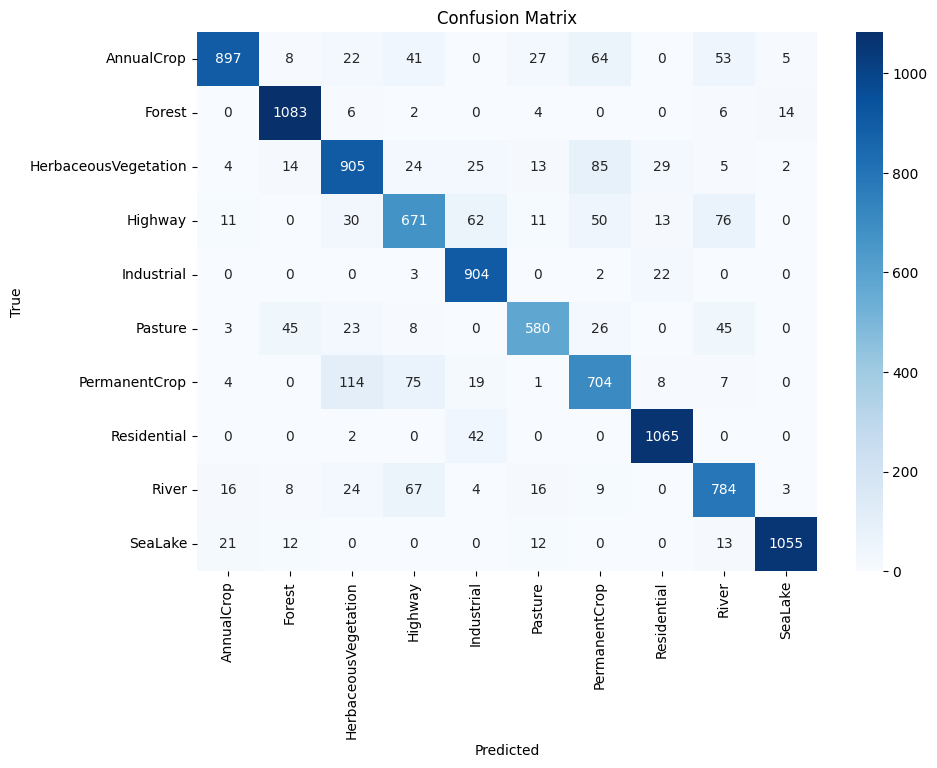

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


class_names = list(validation_generator.class_indices.keys())

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()